In [14]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [19]:
# Defining the directories where the images are present
base_dir='/content/drive/My Drive/Face-Recognition/jay/dataset2'

# Directory with the training and testing examples
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

In [4]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 5s 0us/step


In [5]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
# useful for getting number of classes
folders = glob('/content/drive/My Drive/Face-Recognition/jay/dataset2/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

valid_set = test_datagen.flow_from_directory(valid_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 472 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [22]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/15 [==============================] - 614s 41s/step - loss: 0.1695 - accuracy: 0.9004 - val_loss: 6.2789e-04 - val_accuracy: 1.0000
Epoch 2/5
15/15 [==============================] - 355s 24s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 7.7694e-04 - val_accuracy: 1.0000
Epoch 3/5
15/15 [==============================] - 360s 24s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 2.3620e-04 - val_accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 355s 24s/step - loss: 2.7201e-04 - accuracy: 1.0000 - val_loss: 3.3948e-05 - val_accuracy: 1.0000
Epoch 5/5
15/15 [==============================] - 359s 24s/step - loss: 1.7505e-04 - accuracy: 1.0000 - val_loss: 2.2361e-05 - val_accuracy: 1.0000


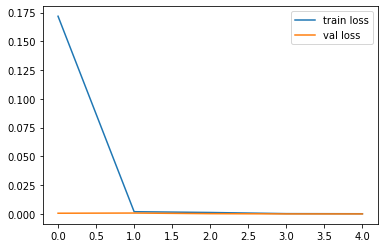

<Figure size 432x288 with 0 Axes>

In [23]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

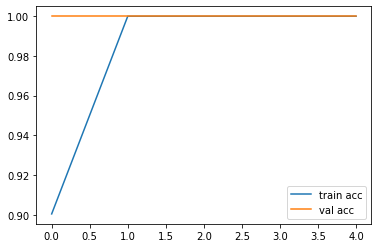

<Figure size 432x288 with 0 Axes>

In [26]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
import tensorflow as tf

from keras.models import load_model

model.save('vgg16_2_model.h5')